# Heart Disease Prediction

### Data Description
This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland
Hungarian
Switzerland
Long Beach VA
Statlog (Heart) Data Set.

This dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.

Data Source: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset?rvi=1

 **Data Dictionary:**
*   Sex 1:  = male, 0= female
*   Chest Pain Type: Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
*   Fasting Blood sugar (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   Resting electrocardiogram results: Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
*   Exercise induced angina: 1 = yes; 0 = no
*   The slope of the peak exercise ST segment:  Value 1: upsloping, Value 2: flat, Value 3: downsloping
*   class 1 = heart disease, 0 = Normal

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
pip install fhir.resources

In [81]:
pip show fhir.resources

Name: fhir.resources
Version: 8.0.0
Summary: FHIR Resources as Model Class
Home-page: https://github.com/nazrulworld/fhir.resources
Author: Md Nazrul Islam
Author-email: email2nazrul@gmail.com
License: BSD license
Location: /usr/local/lib/python3.11/dist-packages
Requires: fhir-core
Required-by: 


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import json
from fhir.resources.patient import Patient
from fhir.resources.observation import Observation
from fhir.resources.condition import Condition
from datetime import datetime
import os
import joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, make_scorer, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [83]:
from xgboost import XGBClassifier

In [84]:
# Loading dataset
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MeldRx/heart_disease.csv')
heart.head()

,patient id,first name,last name,birth date,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,1,Olivia,Johnson,12/03/1984,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,Liam,Brown,25/08/1975,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,Emma,Smith,07/11/1987,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,Noah,Williams,18/06/1976,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,Ava,Davis,04/02/1971,54,1,3,150,195,0,0,122,0,0.0,1,0


In [85]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient id           1190 non-null   int64  
 1   first name           1190 non-null   object 
 2   last name            1190 non-null   object 
 3   birth date           1190 non-null   object 
 4   age                  1190 non-null   int64  
 5   sex                  1190 non-null   int64  
 6   chest pain type      1190 non-null   int64  
 7   resting bp s         1190 non-null   int64  
 8   cholesterol          1190 non-null   int64  
 9   fasting blood sugar  1190 non-null   int64  
 10  resting ecg          1190 non-null   int64  
 11  max heart rate       1190 non-null   int64  
 12  exercise angina      1190 non-null   int64  
 13  oldpeak              1190 non-null   float64
 14  ST slope             1190 non-null   int64  
 15  target               1190 non-null   i

In [86]:
heart.head()

,patient id,first name,last name,birth date,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,1,Olivia,Johnson,12/03/1984,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,Liam,Brown,25/08/1975,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,Emma,Smith,07/11/1987,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,Noah,Williams,18/06/1976,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,Ava,Davis,04/02/1971,54,1,3,150,195,0,0,122,0,0.0,1,0


In [87]:
heart.isnull().sum()

,0
patient id,0
first name,0
last name,0
birth date,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0


In [102]:
heart.columns

Index(['patient id', 'first name', 'last name', 'birth date', 'age', 'gender',
       'chest_pain_type', 'resting_bps', 'cholesterol', 'fasting_blood_sugar',
       'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak',
       'st_slope', 'target', 'cholesterol_level', 'resting bps group'],
      dtype='object')

In [88]:
# Renaming Features
heart = heart.rename(columns={
    'sex': 'gender',
    'chest pain type': 'chest_pain_type',
    'resting bp s': 'resting_bps',
    'fasting blood sugar': 'fasting_blood_sugar',
    'resting ecg': 'resting_ecg',
    'max heart rate': 'max_heart_rate',
    'exercise angina': 'exercise_angina',
    'ST slope': 'st_slope',
    'total cholesterol': 'cholesterol',
})


In [89]:
#Define the bins and labels
bins = [0, 100, 130, 160, 190, float('inf')]
labels = ['Optimal', 'Near optimal', 'Borderline high', 'High', 'Very high']

# Create cholesterol groups
heart['cholesterol_level'] = pd.cut(heart['cholesterol'], bins=bins, labels=labels, right=False)


# Define the bins and labels
bins = [70, 90, 120, 140, 190]
labels = ['Low', 'Ideal', 'Pre-High', 'High']

# Create resting_bps groups
heart['resting bps group'] = pd.cut(heart['resting_bps'], bins=bins, labels=labels, right=False)

# Display the DataFrame
heart.head()

,patient id,first name,last name,birth date,age,gender,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target,cholesterol_level,resting bps group
0,1,Olivia,Johnson,12/03/1984,40,1,2,140,289,0,0,172,0,0.0,1,0,Very high,High
1,2,Liam,Brown,25/08/1975,49,0,3,160,180,0,0,156,0,1.0,2,1,High,High
2,3,Emma,Smith,07/11/1987,37,1,2,130,283,0,1,98,0,0.0,1,0,Very high,Pre-High
3,4,Noah,Williams,18/06/1976,48,0,4,138,214,0,0,108,1,1.5,2,1,Very high,Pre-High
4,5,Ava,Davis,04/02/1971,54,1,3,150,195,0,0,122,0,0.0,1,0,Very high,High


In [90]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   patient id           1190 non-null   int64   
 1   first name           1190 non-null   object  
 2   last name            1190 non-null   object  
 3   birth date           1190 non-null   object  
 4   age                  1190 non-null   int64   
 5   gender               1190 non-null   int64   
 6   chest_pain_type      1190 non-null   int64   
 7   resting_bps          1190 non-null   int64   
 8   cholesterol          1190 non-null   int64   
 9   fasting_blood_sugar  1190 non-null   int64   
 10  resting_ecg          1190 non-null   int64   
 11  max_heart_rate       1190 non-null   int64   
 12  exercise_angina      1190 non-null   int64   
 13  oldpeak              1190 non-null   float64 
 14  st_slope             1190 non-null   int64   
 15  target               

In [91]:
# Splitting features and target
X = heart.drop(['target', 'patient id', 'first name', 'last name', 'birth date', 'cholesterol_level', 'resting bps group'], axis=1)
y = heart['target']

In [92]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

In [93]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Function to evaluate models
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')

    print('Classification Report (Test Data):')
    print(classification_report(y_test, y_test_pred))

    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

    return train_accuracy, test_accuracy, train_f1, test_f1

def evaluate_ensemble(ensemble_model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')

    print('Classification Report (Test Data):')
    print(classification_report(y_test, y_test_pred))

    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

    return train_accuracy, test_accuracy, train_f1, test_f1

In [95]:
models = {
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

param_grids = {
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

results = []


Model: XGBoost
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Train Accuracy: 0.9968
Test Accuracy: 0.9328
Train F1 Score: 0.9970
Test F1 Score: 0.9360
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       112
           1       0.94      0.93      0.94       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

Confusion Matrix (Test Data):


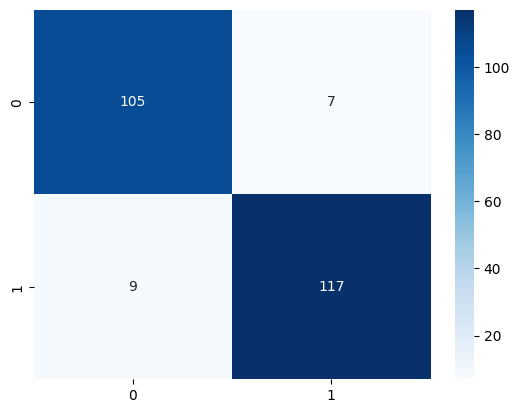

In [96]:
# Using Grid search to find the best hyperparameter
for model_name, model in models.items():
    print(f'\nModel: {model_name}')
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')

    train_acc, test_acc, train_f1, test_f1 = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)

    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

In [97]:
y_test_pred = best_model.predict(X_test)

prediction_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_test_pred
})

prediction_df['Correct Prediction'] = prediction_df['True Label'] == prediction_df['Predicted Label']

print(prediction_df.head(50))

prediction_df.value_counts()

      True Label  Predicted Label  Correct Prediction
369            1                1                True
1089           0                0                True
305            1                1                True
770            0                0                True
259            0                0                True
623            1                0               False
22             0                0                True
475            0                0                True
126            0                0                True
1159           1                1                True
651            1                1                True
408            1                1                True
116            1                1                True
530            1                1                True
627            0                0                True
868            0                0                True
361            1                1                True
170            0            

,,,count
True Label,Predicted Label,Correct Prediction,
1,1,True,117
0,0,True,105
1,0,False,9
0,1,False,7


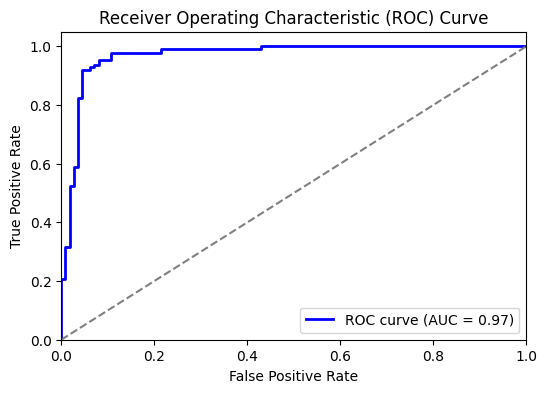

In [98]:
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [99]:
import pickle

# Save the trained model
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Model saved successfully!")

Model saved successfully!


In [121]:
# Load JSON file
with open("/content/drive/MyDrive/Colab Notebooks/MeldRx/heart_fhir_data.json", "r") as file:
    data = json.load(file)

def extract_patient_data(patient_id):
    """Extracts relevant observations for a given patient ID."""
    patient_data = {
        "age": None,
        "gender": None,
        "chest_pain_type": None,
        "resting_bps": None,
        "cholesterol": None,
        "fasting_blood_sugar": None,
        "resting_ecg": None,
        "max_heart_rate": None,
        "exercise_angina": None,
        "oldpeak": None,
        "st_slope": None
    }

    # Extract patient details
    for entry in data:
        if entry["resourceType"] == "Patient" and entry["id"] == str(patient_id):
            birth_year = int(entry["birthDate"].split("-")[0])
            patient_data["age"] = 2025 - birth_year
            patient_data["gender"] = 1 if entry["gender"] == "male" else 0

        elif entry["resourceType"] == "Observation" and f"obs-{patient_id}" in entry["id"]:
            feature_name = entry["code"]["text"].lower().replace(" ", "_")
            if "valueQuantity" in entry:
                patient_data[feature_name] = entry["valueQuantity"]["value"]
            elif "valueBoolean" in entry:
                patient_data[feature_name] = int(entry["valueBoolean"])
            elif "valueString" in entry:
                patient_data[feature_name] = int(entry["valueString"])

    # Rename features to match model's expected input format
    feature_mapping = {
        "chest_pain_type": "chest_pain_type",
        "systolic_blood_pressure": "resting_bps",
        "total_cholesterol": "cholesterol",
        "maximum_heart_rate": "max_heart_rate",
        "st_depression": "oldpeak",
        "fasting_blood_sugar": "fasting_blood_sugar",
        "exercise_angina": "exercise_angina",
        "st_slope": "st_slope"
    }

    formatted_data = {feature_mapping.get(k, k): v for k, v in patient_data.items()}

    # Convert missing values to NaN
    for feature in formatted_data.keys():
        if formatted_data[feature] is None:
            formatted_data[feature] = np.nan  # Set missing values as NaN

    return formatted_data

## Validation

In [122]:
# Select a patient
patient_id = 623
patient_features = extract_patient_data(patient_id)

df = pd.DataFrame([patient_features])

# Load trained ML model
try:
    model = joblib.load("heart_disease_model.pkl")
    prediction = model.predict(df)

    print(f"Prediction for Patient {patient_id}: {'At Risk' if prediction[0] == 1 else 'Not at Risk'}")

except Exception as e:
    print(f"Error loading model or making prediction: {e}")


Prediction for Patient 623: Not at Risk


In [123]:
# Select a patient
patient_id = 1056
patient_features = extract_patient_data(patient_id)

# Convert to DataFrame and ensure it matches the model’s expected input
df = pd.DataFrame([patient_features])

# Load trained ML model
try:
    model = joblib.load("heart_disease_model.pkl")
    prediction = model.predict(df)

    print(f"Prediction for Patient {patient_id}: {'At Risk' if prediction[0] == 1 else 'Not at Risk'}")

except Exception as e:
    print(f"Error loading model or making prediction: {e}")


Prediction for Patient 1056: Not at Risk


In [124]:
# Select a patient
patient_id = 3
patient_features = extract_patient_data(patient_id)

# Convert to DataFrame and ensure it matches the model’s expected input
df = pd.DataFrame([patient_features])

# Load trained ML model
try:
    model = joblib.load("heart_disease_model.pkl")
    prediction = model.predict(df)

    print(f"Prediction for Patient {patient_id}: {'At Risk' if prediction[0] == 1 else 'Not at Risk'}")

except Exception as e:
    print(f"Error loading model or making prediction: {e}")


Prediction for Patient 3: At Risk


In [125]:
# Select a patient
patient_id = 23
patient_features = extract_patient_data(patient_id)

# Convert to DataFrame and ensure it matches the model’s expected input
df = pd.DataFrame([patient_features])

# Load trained ML model
try:
    model = joblib.load("heart_disease_model.pkl")
    prediction = model.predict(df)

    print(f"Prediction for Patient {patient_id}: {'At Risk' if prediction[0] == 1 else 'Not at Risk'}")

except Exception as e:
    print(f"Error loading model or making prediction: {e}")


Prediction for Patient 23: At Risk


In [126]:
# Select a patient
patient_id = 100
patient_features = extract_patient_data(patient_id)

# Convert to DataFrame and ensure it matches the model’s expected input
df = pd.DataFrame([patient_features])

# Load trained ML model
try:
    model = joblib.load("heart_disease_model.pkl")
    prediction = model.predict(df)

    print(f"Prediction for Patient {patient_id}: {'At Risk' if prediction[0] == 1 else 'Not at Risk'}")

except Exception as e:
    print(f"Error loading model or making prediction: {e}")


Prediction for Patient 100: Not at Risk
